In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"
from IPython.display import Image

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import stats
import scipy 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [68]:
grid_250 = pd.read_csv('/Users/Desktop/DataCampus/data/real_data/250grid_all.csv')

In [69]:
grid_250 = grid_250.fillna(0)

In [70]:
grid_250.head(3)

,INDEX,ID,총인구,고등여성인구,20대여성인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,행정동코드,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_전체,행정동면적
0,0,다마54ba65ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30187,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,24.28
1,1,다마54ba65ba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6860,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,24.28
2,2,다마54bb65aa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,23000,조촌동,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,24.28


In [71]:
grid_250['성폭력취약인구'] = grid_250['고등여성인구']+grid_250['20대여성인구']
grid_250['건축물(30_)'] = grid_250['건축물(30_34)']+grid_250['건축물(35)']
grid_250['GRADE_전체'] = grid_250['GRADE_전체'].apply(lambda x: x-1 if x>0 else x)
grid_250 = grid_250.drop(columns = ['20대여성인구','고등여성인구','INDEX'])

In [72]:
grid_250.describe()

,총인구,유소년인구,고령인구,건축물(30_34),건축물(35),개별주택가격,공시지가,가로등,공영주차장,공중화장실,교육시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_전체,행정동면적,성폭력취약인구,건축물(30_)
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3.498000e+03,3.498000e+03,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,187.329903,21.478845,31.931961,1.466266,6.439394,6.437332e+07,1.939918e+05,4.222699,0.022870,0.092624,1.057176,0.010863,0.024871,0.078616,0.162664,2.918811,9.642367,0.118067,0.405660,0.070040,0.173528,0.236135,2.496855,3.412236,0.013722,0.005432,0.383648,1.086907,1.964265,0.819039,15.019620,14.837050,7.905660
std,473.743383,68.857221,81.631053,6.952647,22.376389,1.322315e+08,3.246397e+05,9.141901,0.167549,0.437710,4.212492,0.116653,0.190447,1.083236,0.513597,7.977143,27.358086,0.986938,1.990783,0.329574,0.728062,1.114666,10.524947,10.804282,0.116352,0.073510,0.911770,2.897327,4.619727,1.605365,8.745705,40.751853,25.614288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.763250e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.380000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.299000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.640000,0.000000,0.000000
75%,49.000000,0.000000,15.000000,0.000000,1.000000,9.123202e+07,2.281718e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,24.280000,0.000000,2.000000
max,3685.000000,754.000000,1081.000000,177.000000,252.000000,4.706000e+09,3.253211e+06,82.000000,3.000000,7.000000,81.000000,2.000000,4.000000,33.000000,5.000000,79.000000,541.000000,21.000000,32.000000,5.000000,11.000000,23.000000,206.000000,161.000000,1.000000,1.000000,7.000000,26.000000,56.000000,10.000000,26.600000,357.000000,259.000000


### 행정동별로 평균 범죄주의구간 등급 확인

In [73]:
dong_rank = grid_250[['GRADE_전체']].groupby(grid_250['행정동코드']).mean()
dong_rank.mean(axis=1).sort_values(ascending=False)

행정동코드
금암1동     5.388889
인후3동     4.178571
인후1동     4.000000
인후2동     3.692308
효자3동     3.642857
중앙동      3.500000
삼천2동     3.333333
진북동      3.321429
중화산2동    3.080000
금암2동     3.000000
서신동      2.825000
효자2동     2.769231
평화1동     2.705882
삼천1동     2.500000
우아1동     2.342857
중화산1동    2.300000
덕진동      2.098765
풍남동      2.096774
완산동      2.000000
노송동      1.878788
효자5동     1.737374
송천1동     1.675325
효자1동     1.500000
혁신동      0.904762
효자4동     0.847328
팔복동      0.750000
송천2동     0.687500
여의동      0.542751
호성동      0.539568
평화2동     0.535581
서서학동     0.423077
우아2동     0.396419
삼천3동     0.189979
조촌동      0.160920
동서학동     0.108209
dtype: float64

### 랭킹 
#### 1. 금암1동, 인후3동, 인후1동, 효자3동, 인후2동

In [74]:
grid_250.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_전체', '행정동면적',
       '성폭력취약인구', '건축물(30_)'],
      dtype='object')

In [75]:
len(grid_250.query('GRADE_전체==0'))

2448

In [76]:
len(grid_250.query('GRADE_전체!=0'))

1050

In [77]:
len(grid_250)

3498

- 타겟이 모두 0인 로우 2434개
- 타겟이 모두 0보다 큰 로우 273개
- 타겟이 하나라도 0보다 큰 로우 1064개

In [78]:
feat_N = grid_250[(grid_250['총인구']==0)&(grid_250['건축물(30_34)']==0)&(grid_250['건축물(35)']==0)&(grid_250['가로등']==0)&(grid_250['공영주차장']==0)&(grid_250['공중화장실']==0)&(grid_250['숙박업소']==0)
        &(grid_250['대규모점포']==0)&(grid_250['대부업현황']==0)&(grid_250['상가']==0)&(grid_250['어린이보호']==0)&(grid_250['원룸_오피스텔']==0)&(grid_250['cctv']==0)&(grid_250['신호등']==0)&(grid_250['횡단보도']==0)
        &(grid_250['버스정류장']==0)&(grid_250['개별주택가격']==0)] #target 제외 모든 변수가 0인 row
feat_Y = grid_250[(grid_250['총인구']>0)|(grid_250['건축물(30_34)']>0)|(grid_250['건축물(35)']>0)|(grid_250['가로등']>0)|(grid_250['공영주차장']>0)|(grid_250['공중화장실']>0)|(grid_250['숙박업소']>0)
        |(grid_250['대규모점포']>0)|(grid_250['대부업현황']>0)|(grid_250['상가']>0)|(grid_250['어린이보호']>0)|(grid_250['원룸_오피스텔']>0)|(grid_250['cctv']>0)|(grid_250['신호등']>0)|(grid_250['횡단보도']>0)
        |(grid_250['버스정류장']>0)|(grid_250['개별주택가격']>0)] #target 제외 모든 변수가 0보다 큰 row


In [79]:
print(len(grid_250),len(feat_N),len(feat_Y))

3498 1460 2038


- 모든 피쳐가 0인 행이 `1460`개이고, 한 피쳐라도 0보다 큰 행은 `2038`개 (공시지가와 타겟 제외)

In [80]:
print(len(grid_250[grid_250['GRADE_전체']>0]))
print(len(feat_Y[feat_Y['GRADE_전체']>0]))
print(len(feat_N[feat_N['GRADE_전체']>0]))

1050
1015
35


- 범죄등급이 0보다 큰 로우는 1050
- 모든 피쳐가 0임에도 불구하도 범죄등급이 있는 로우는 35개였다.

### 피쳐가 없는 격자들 지도에서 탐색해보기

In [81]:
feat_Y_ID = list(feat_Y['ID'])

In [82]:
out = open('/Users/gimdong-wan/Desktop/out.txt','w')

In [83]:
print(feat_Y_ID,file = out)

#### 해당 격자들은 대부분 산지나, 강, 도로 등 시설물이 없는 곳들을 나타낸다.  
#### 따라서 본 연구는 범죄에 영향을 미치는 요인을 파악하기 위함이므로 제거해도 좋을 것 이라 판단된다.

In [86]:
new_grid = feat_Y

In [87]:
new_grid.columns

Index(['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', 'GRADE_전체', '행정동면적',
       '성폭력취약인구', '건축물(30_)'],
      dtype='object')

In [88]:
new_grid = new_grid[['ID', '총인구', '유소년인구', '고령인구', '건축물(30_34)', '건축물(35)', '개별주택가격', '공시지가',
       '행정동코드', '가로등', '공영주차장', '공중화장실', '교육시설', '대규모점포', '대부업현황', '룸살롱',
       '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집', '오락시설', '원룸_오피스텔',
       '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도', '행정동면적',
       '성폭력취약인구', '건축물(30_)', 'GRADE_전체']]

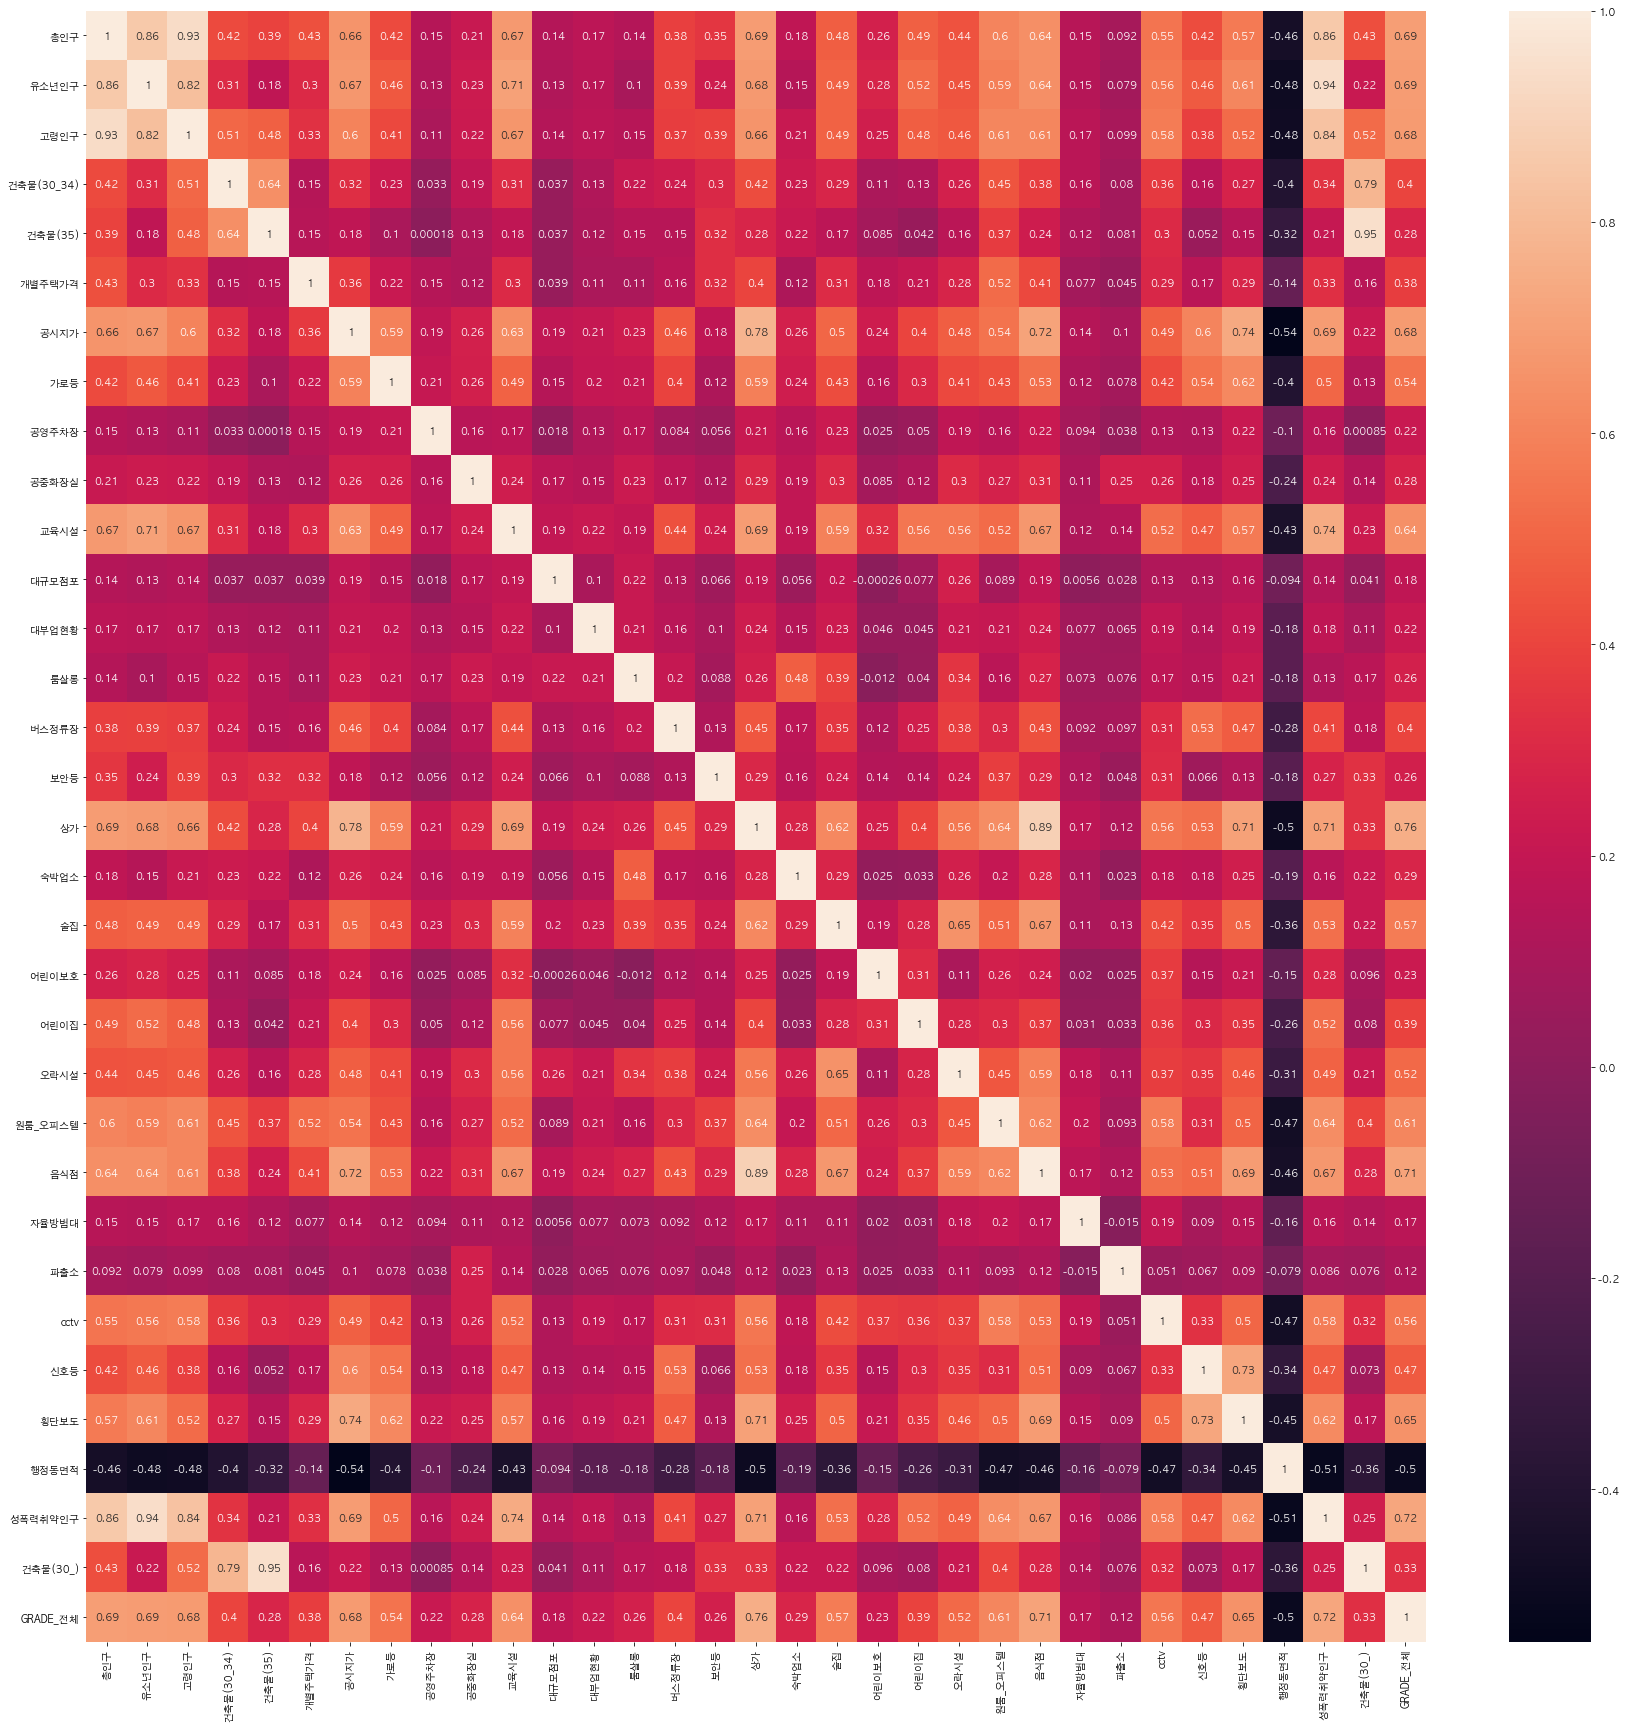

In [48]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_grid.corr(method = 'spearman'), annot=True)
plt.show()

### 전체 변수 간 상관관계 
 - 인구 사회학적 변수는 변수간 상관관계가 크며, 이는 다중공선성 제거를 위해 변수를 선택할 필요가 있다. 또한, 대부분 범죄 등급과도 큰 상관관계를 보이고 있다. 

#### 종속변수 (3대범죄)를 기반으로 한 상관계수 확인
 
- `인구` : 총인구 (0.69),성폭력취약인구(0.72), 유소년인구(0.69), 고령인구(0.68)
- `토지` : 30년 이상35년 미만 건축물(0.4), 35년 이상건축물(0.28), 30년 이상 건축물 (0.33),개별주택가격 (0.38), 공시지가(0.68)
- `시설물` : 가로등(0.54), 공영주차장(0.22), 공중화장실(0.28), 교육시설(0.64), 대규모점포(0.18), 대부업체현황(0.22), 룸살롱(0.26), 버스정류장(0.4), 보안등(0.26), 상가(0.76), 숙박업소(0.24), 술집(0.57), 어린이보호구역(0.23), 어린이집(0.39), 오락시설(0.52), 원룸_오피스텔(0.61), 음식점(0.71), 자율방범대(0.17), 파출소(0.12), cctv(0.56), 신호등(0.47), 횡단보도(0.65)

In [57]:
new_grid.var()

총인구           1.000491
유소년인구         1.000491
고령인구          1.000491
건축물(30_34)    1.000491
건축물(35)       1.000491
개별주택가격        1.000491
공시지가          1.000491
가로등           1.000491
공영주차장         1.000491
공중화장실         1.000491
교육시설          1.000491
대규모점포         1.000491
대부업현황         1.000491
룸살롱           1.000491
버스정류장         1.000491
보안등           1.000491
상가            1.000491
숙박업소          1.000491
술집            1.000491
어린이보호         1.000491
어린이집          1.000491
오락시설          1.000491
원룸_오피스텔       1.000491
음식점           1.000491
자율방범대         1.000491
파출소           1.000491
cctv          1.000491
신호등           1.000491
횡단보도          1.000491
행정동면적         1.000491
성폭력취약인구       1.000491
건축물(30_)      1.000491
GRADE_전체      3.626455
dtype: float64

### 폭력 범죄 발생지/미발생지 t-test

In [24]:
crime_Y = new_grid[new_grid['GRADE_전체']>0]
crime_N = new_grid[new_grid['GRADE_전체']==0]

In [25]:
new_grid['범죄빈도_4'] = 0

new_grid.loc[(new_grid['GRADE_전체']==0),'범죄빈도_4'] = 0
new_grid.loc[(new_grid['GRADE_전체']>0)&(new_grid['GRADE_전체']<4),'범죄빈도_4'] = 1
new_grid.loc[(new_grid['GRADE_전체']>=4)&(new_grid['GRADE_전체']<8),'범죄빈도_4'] = 2
new_grid.loc[(new_grid['GRADE_전체']>=8)&(new_grid['GRADE_전체']<11),'범죄빈도_4'] = 3

numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_전체')
numerical_feats.remove('범죄빈도_4')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))
scaler = StandardScaler()
new_grid[numerical_feats] = scaler.fit_transform(new_grid[numerical_feats])

Number of Numerical features:  32
Number of Categorical features:  2


x1_mean :  589.9418719211823 / x2_mean :  55.21896383186706


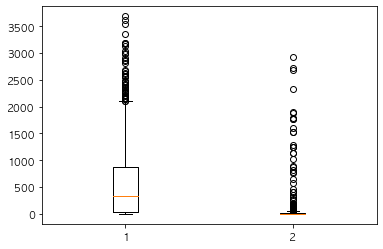

LeveneResult(statistic=570.3979219162891, pvalue=2.4154153091535556e-111)


Ttest_indResult(statistic=23.12697687733388, pvalue=3.864997106780992e-99)

In [26]:
x1 = np.array(crime_Y['총인구'])
x2 = np.array(crime_N['총인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['총인구']), np.array(crime_N['총인구'])))
scipy.stats.ttest_ind(np.array(crime_Y['총인구']), np.array(crime_N['총인구']), equal_var=False)

##### 총인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  48.24334975369458 / x2_mean :  2.8670576735092865


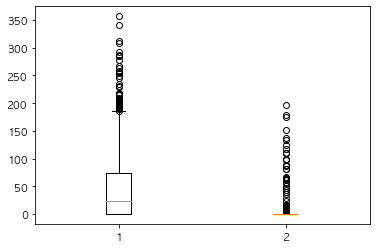

LeveneResult(statistic=603.7024149798187, pvalue=5.7539029945379e-117)


Ttest_indResult(statistic=22.45677144465162, pvalue=4.00983003161012e-93)

In [27]:
x1 = np.array(crime_Y['성폭력취약인구'])
x2 = np.array(crime_N['성폭력취약인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['성폭력취약인구']), np.array(crime_N['성폭력취약인구'])))
scipy.stats.ttest_ind(np.array(crime_Y['성폭력취약인구']), np.array(crime_N['성폭력취약인구']), equal_var=False)

##### 성폭력 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  64.83645320197044 / x2_mean :  9.114369501466276


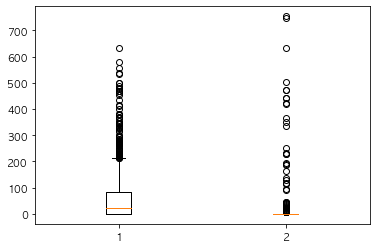

LeveneResult(statistic=232.14184678565593, pvalue=1.0094978656221058e-49)


Ttest_indResult(statistic=15.225902557212004, pvalue=4.1682925382392305e-49)

In [28]:
x1 = np.array(crime_Y['유소년인구'])
x2 = np.array(crime_N['유소년인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['유소년인구']), np.array(crime_N['유소년인구'])))
scipy.stats.ttest_ind(np.array(crime_Y['유소년인구']), np.array(crime_N['유소년인구']), equal_var=False)

##### 유소년 취약인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  102.66305418719212 / x2_mean :  7.3264907135874875


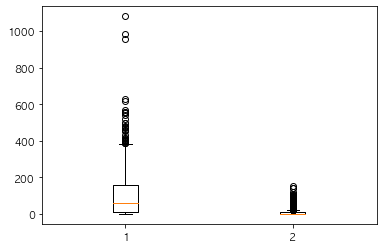

LeveneResult(statistic=0.0, pvalue=1.0)


Ttest_indResult(statistic=0.0, pvalue=1.0)

In [29]:
x1 = np.array(crime_Y['고령인구'])
x2 = np.array(crime_N['고령인구'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['고령인구']), np.array(crime_Y['고령인구'])))
scipy.stats.ttest_ind(np.array(crime_N['고령인구']), np.array(crime_N['고령인구']), equal_var=False)

##### 고령인구수에는 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  4.691625615763547 / x2_mean :  0.3587487781036168


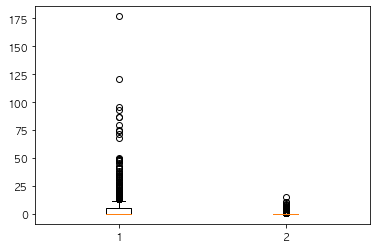

LeveneResult(statistic=0.0, pvalue=1.0)


Ttest_indResult(statistic=0.0, pvalue=1.0)

In [30]:
x1 = np.array(crime_Y['건축물(30_34)'])
x2 = np.array(crime_N['건축물(30_34)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['건축물(30_34)']), np.array(crime_Y['건축물(30_34)'])))
scipy.stats.ttest_ind(np.array(crime_N['건축물(30_34)']), np.array(crime_N['건축물(30_34)']), equal_var=False)

##### 건축물(30~34년) 유의한 차이를 보인다

x1_mean :  20.24039408866995 / x2_mean :  1.9364613880742914


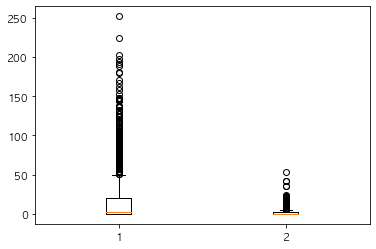

LeveneResult(statistic=241.04375675791843, pvalue=1.8410534899638752e-51)


Ttest_indResult(statistic=15.284431860482249, pvalue=9.707390991079731e-48)

In [31]:
x1 = np.array(crime_Y['건축물(35)'])
x2 = np.array(crime_N['건축물(35)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['건축물(35)']), np.array(crime_N['건축물(35)'])))
scipy.stats.ttest_ind(np.array(crime_Y['건축물(35)']), np.array(crime_N['건축물(35)']), equal_var=False)

##### 35년이상 건축물 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  24.932019704433497 / x2_mean :  2.2952101661779083


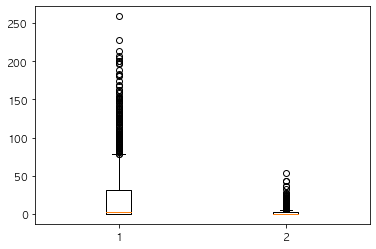

LeveneResult(statistic=290.35607185059234, pvalue=5.7187681679254086e-61)


Ttest_indResult(statistic=16.765676616429356, pvalue=4.906977493325639e-56)

In [32]:
x1 = np.array(crime_Y['건축물(30_)'])
x2 = np.array(crime_N['건축물(30_)'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['건축물(30_)']), np.array(crime_N['건축물(30_)'])))
scipy.stats.ttest_ind(np.array(crime_Y['건축물(30_)']), np.array(crime_N['건축물(30_)']), equal_var=False)

##### 30년이상 건축물에서 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  147005172.2187192 / x2_mean :  74259647.04887585


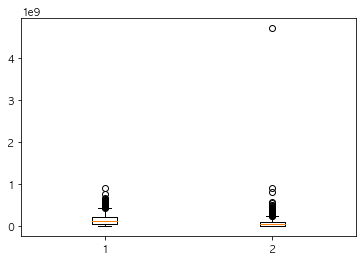

LeveneResult(statistic=38.00815110205013, pvalue=8.471162928491949e-10)


Ttest_indResult(statistic=10.696318606066557, pvalue=5.508970092185108e-26)

In [33]:
x1 = np.array(crime_Y['개별주택가격'])
x2 = np.array(crime_N['개별주택가격'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['개별주택가격']), np.array(crime_N['개별주택가격'])))
scipy.stats.ttest_ind(np.array(crime_Y['개별주택가격']), np.array(crime_N['개별주택가격']), equal_var=False)

##### 개별주택가격에서 유의한 차이를 보인다. (2배정도)

x1_mean :  502398.90640394087 / x2_mean :  128633.12414467253


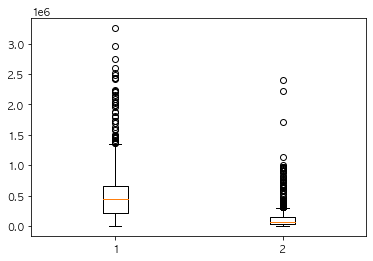

LeveneResult(statistic=0.0, pvalue=1.0)


Ttest_indResult(statistic=0.0, pvalue=1.0)

In [34]:
x1 = np.array(crime_Y['공시지가'])
x2 = np.array(crime_N['공시지가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['공시지가']), np.array(crime_Y['공시지가'])))
scipy.stats.ttest_ind(np.array(crime_N['공시지가']), np.array(crime_N['공시지가']), equal_var=False)

##### 가로등수에서도 유의한 차이를 보인다, 하지만 이상치들도 꽤 많음을 알 수 있음 

x1_mean :  0.0729064039408867 / x2_mean :  0.005865102639296188


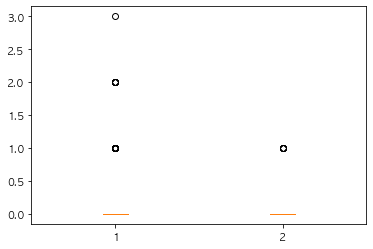

LeveneResult(statistic=49.30011890410907, pvalue=2.981503333933997e-12)


Ttest_indResult(statistic=6.997323135653556, pvalue=4.425615582195506e-12)

In [35]:
x1 = np.array(crime_Y['공영주차장'])
x2 = np.array(crime_N['공영주차장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['공영주차장']), np.array(crime_N['공영주차장'])))
scipy.stats.ttest_ind(np.array(crime_Y['공영주차장']), np.array(crime_N['공영주차장']), equal_var=False)

In [36]:
len(new_grid[new_grid['공영주차장']>0])

71

##### 공영주차장에서도 차이를 보인다 할 수 있으나, 주차장 자체가 많지 않다.

x1_mean :  0.2689655172413793 / x2_mean :  0.04985337243401759


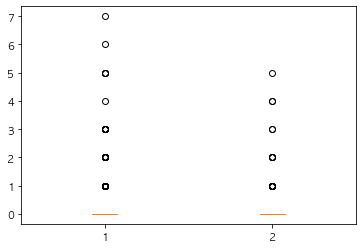

LeveneResult(statistic=0.0, pvalue=1.0)


Ttest_indResult(statistic=0.0, pvalue=1.0)

In [37]:
x1 = np.array(crime_Y['공중화장실'])
x2 = np.array(crime_N['공중화장실'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['공중화장실']), np.array(crime_Y['공중화장실'])))
scipy.stats.ttest_ind(np.array(crime_N['공중화장실']), np.array(crime_N['공중화장실']), equal_var=False)

In [38]:
len(new_grid[new_grid['공중화장실']>0])

214

##### 공중화장실 수에서 유의한 차이를 보인다. 하지만 큰 차이가 있다고 보기 어려울 것 같다.   

x1_mean :  3.553694581280788 / x2_mean :  0.08504398826979472


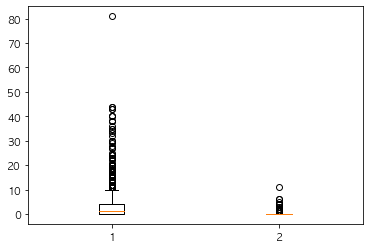

LeveneResult(statistic=255.9367728042401, pvalue=2.3515128317509273e-54)


Ttest_indResult(statistic=15.266991964863378, pvalue=1.4139079827441021e-47)

In [39]:
x1 = np.array(crime_Y['교육시설'])
x2 = np.array(crime_N['교육시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['교육시설']), np.array(crime_N['교육시설'])))
scipy.stats.ttest_ind(np.array(crime_Y['교육시설']), np.array(crime_N['교육시설']), equal_var=False)

##### 교육시설 수에서 유의한 차이를 보인다. 

x1_mean :  0.0374384236453202 / x2_mean :  0.0


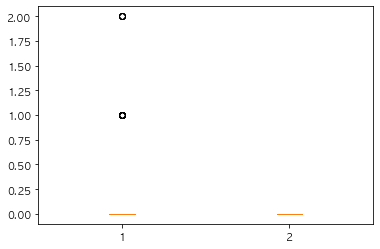

LeveneResult(statistic=31.215888224421338, pvalue=2.618576262091907e-08)


Ttest_indResult(statistic=5.565218397191977, pvalue=3.350612237204382e-08)

In [40]:
x1 = np.array(crime_Y['대규모점포'])
x2 = np.array(crime_N['대규모점포'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['대규모점포']), np.array(crime_N['대규모점포'])))
scipy.stats.ttest_ind(np.array(crime_Y['대규모점포']), np.array(crime_N['대규모점포']), equal_var=False)

#### 폭력사건은 대규모 점포가 있는 격자에서만 발생했다.

x1_mean :  0.08374384236453201 / x2_mean :  0.0019550342130987292


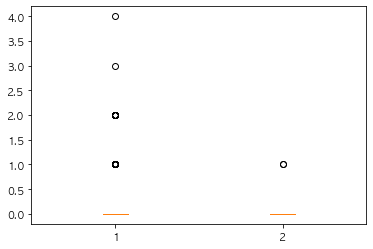

LeveneResult(statistic=56.93485215244439, pvalue=6.750487015287203e-14)


Ttest_indResult(statistic=7.516902233996248, pvalue=1.201606543864944e-13)

In [41]:
x1 = np.array(crime_Y['대부업현황'])
x2 = np.array(crime_N['대부업현황'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['대부업현황']), np.array(crime_N['대부업현황'])))
scipy.stats.ttest_ind(np.array(crime_Y['대부업현황']), np.array(crime_N['대부업현황']), equal_var=False)

x1_mean :  0.4896551724137931 / x2_mean :  0.07038123167155426


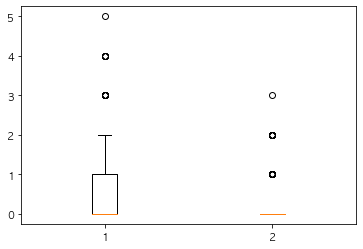

LeveneResult(statistic=237.87947149066557, pvalue=7.628105531939271e-51)


Ttest_indResult(statistic=15.378675952465759, pvalue=3.43564151096025e-49)

In [42]:
x1 = np.array(crime_Y['버스정류장'])
x2 = np.array(crime_N['버스정류장'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['버스정류장']), np.array(crime_N['버스정류장'])))
scipy.stats.ttest_ind(np.array(crime_Y['버스정류장']), np.array(crime_N['버스정류장']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  8.009852216748769 / x2_mean :  1.8318670576735092


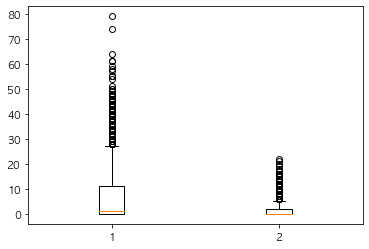

LeveneResult(statistic=217.21948206175787, pvalue=8.615654523478144e-47)


Ttest_indResult(statistic=14.659955462899797, pvalue=8.938561170748085e-45)

In [43]:
x1 = np.array(crime_Y['보안등'])
x2 = np.array(crime_N['보안등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['보안등']), np.array(crime_N['보안등'])))
scipy.stats.ttest_ind(np.array(crime_Y['보안등']), np.array(crime_N['보안등']), equal_var=False)

#### 비교적 버스정류장이 있는 곳에서 범죄가 발생했다

x1_mean :  31.751724137931035 / x2_mean :  1.4672531769305963


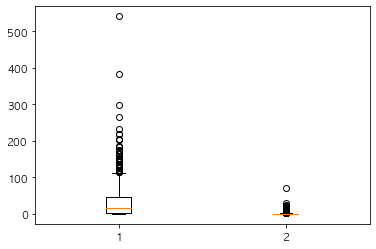

LeveneResult(statistic=469.46420230447103, pvalue=7.547538840313754e-94)


Ttest_indResult(statistic=22.19081248885371, pvalue=1.8234349073055447e-89)

In [44]:
x1 = np.array(crime_Y['상가'])
x2 = np.array(crime_N['상가'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['상가']), np.array(crime_N['상가'])))
scipy.stats.ttest_ind(np.array(crime_Y['상가']), np.array(crime_N['상가']), equal_var=False)

#### 상가수에는 꽤 큰 차이를 보인다

x1_mean :  0.4009852216748768 / x2_mean :  0.005865102639296188


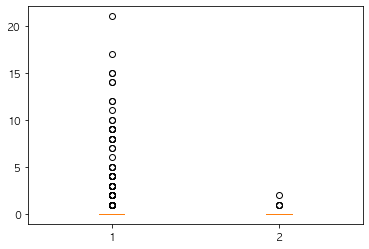

LeveneResult(statistic=49.1977101858654, pvalue=3.137415517652781e-12)


Ttest_indResult(statistic=6.986746695235049, pvalue=5.07450984525522e-12)

In [45]:
x1 = np.array(crime_Y['숙박업소'])
x2 = np.array(crime_N['숙박업소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['숙박업소']), np.array(crime_N['숙박업소'])))
scipy.stats.ttest_ind(np.array(crime_Y['숙박업소']), np.array(crime_N['숙박업소']), equal_var=False)

x1_mean :  1.374384236453202 / x2_mean :  0.02346041055718475


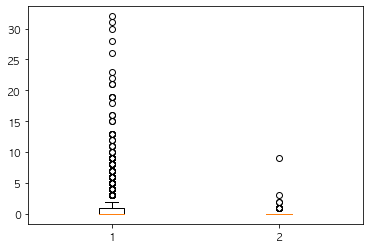

LeveneResult(statistic=151.2414419578962, pvalue=1.3986032276084022e-33)


Ttest_indResult(statistic=12.25062596056616, pvalue=2.6042945614869286e-32)

In [46]:
x1 = np.array(crime_Y['술집'])
x2 = np.array(crime_N['술집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['술집']), np.array(crime_N['술집'])))
scipy.stats.ttest_ind(np.array(crime_Y['술집']), np.array(crime_N['술집']), equal_var=False)

x1_mean :  0.19507389162561575 / x2_mean :  0.04594330400782014


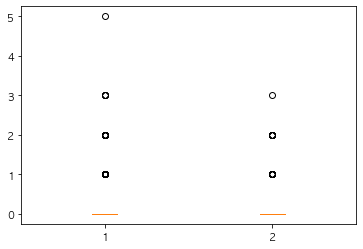

LeveneResult(statistic=64.76423857260542, pvalue=1.419796616995497e-15)


Ttest_indResult(statistic=8.02817955305788, pvalue=2.0099654454141905e-15)

In [47]:
x1 = np.array(crime_Y['어린이보호'])
x2 = np.array(crime_N['어린이보호'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['어린이보호']), np.array(crime_N['어린이보호'])))
scipy.stats.ttest_ind(np.array(crime_Y['어린이보호']), np.array(crime_N['어린이보호']), equal_var=False)

x1_mean :  0.5536945812807882 / x2_mean :  0.043010752688172046


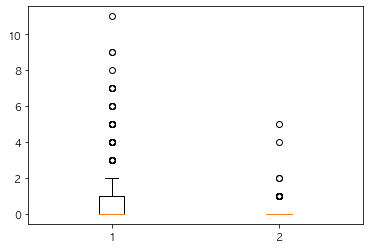

LeveneResult(statistic=164.464341478221, pvalue=2.9127303460247387e-36)


Ttest_indResult(statistic=12.77882764057632, pvalue=5.420079220334704e-35)

In [48]:
x1 = np.array(crime_Y['어린이집'])
x2 = np.array(crime_N['어린이집'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['어린이집']), np.array(crime_N['어린이집'])))
scipy.stats.ttest_ind(np.array(crime_Y['어린이집']), np.array(crime_N['어린이집']), equal_var=False)

x1_mean :  0.8039408866995074 / x2_mean :  0.009775171065493646


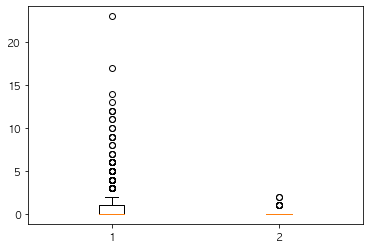

LeveneResult(statistic=168.44999824259904, pvalue=4.565521734581846e-37)


Ttest_indResult(statistic=12.928316764882222, pvalue=1.6132840400224775e-35)

In [49]:
x1 = np.array(crime_Y['오락시설'])
x2 = np.array(crime_N['오락시설'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['오락시설']), np.array(crime_N['오락시설'])))
scipy.stats.ttest_ind(np.array(crime_Y['오락시설']), np.array(crime_N['오락시설']), equal_var=False)

x1_mean :  8.34679802955665 / x2_mean :  0.2561094819159335


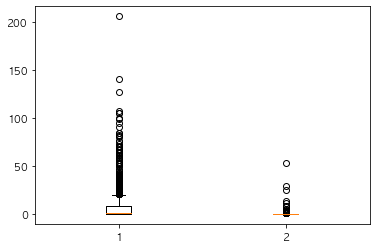

LeveneResult(statistic=203.74943316249383, pvalue=3.9691161352455915e-44)


Ttest_indResult(statistic=14.1113274672833, pvalue=1.6403138905168535e-41)

In [50]:
x1 = np.array(crime_Y['원룸_오피스텔'])
x2 = np.array(crime_N['원룸_오피스텔'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['원룸_오피스텔']), np.array(crime_N['원룸_오피스텔'])))
scipy.stats.ttest_ind(np.array(crime_Y['원룸_오피스텔']), np.array(crime_N['원룸_오피스텔']), equal_var=False)

x1_mean :  11.298522167487684 / x2_mean :  0.4574780058651026


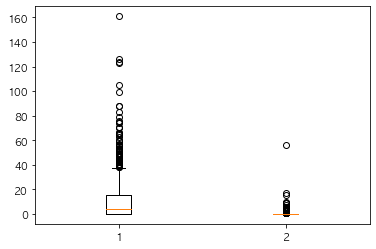

LeveneResult(statistic=386.02216214798483, pvalue=7.720027307944158e-79)


Ttest_indResult(statistic=19.470232972960765, pvalue=2.8480098212599836e-72)

In [51]:
x1 = np.array(crime_Y['음식점'])
x2 = np.array(crime_N['음식점'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['음식점']), np.array(crime_N['음식점'])))
scipy.stats.ttest_ind(np.array(crime_Y['음식점']), np.array(crime_N['음식점']), equal_var=False)

x1_mean :  0.04433497536945813 / x2_mean :  0.002932551319648094


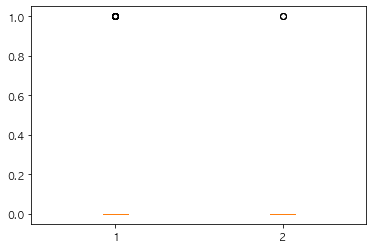

LeveneResult(statistic=38.65854729073387, pvalue=6.107674244044939e-10)


Ttest_indResult(statistic=6.196370063243881, pvalue=8.030003912176336e-10)

In [52]:
x1 = np.array(crime_Y['자율방범대'])
x2 = np.array(crime_N['자율방범대'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['자율방범대']), np.array(crime_N['자율방범대'])))
scipy.stats.ttest_ind(np.array(crime_Y['자율방범대']), np.array(crime_N['자율방범대']), equal_var=False)

x1_mean :  0.0187192118226601 / x2_mean :  0.0


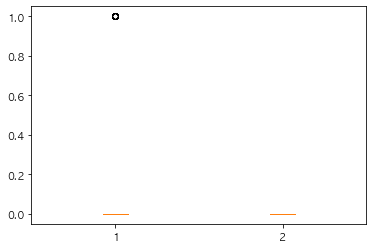

LeveneResult(statistic=19.495909053288727, pvalue=1.0609604408981703e-05)


Ttest_indResult(statistic=4.398110218488835, pvalue=1.2072640794804914e-05)

In [53]:
x1 = np.array(crime_Y['파출소'])
x2 = np.array(crime_N['파출소'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['파출소']), np.array(crime_N['파출소'])))
scipy.stats.ttest_ind(np.array(crime_Y['파출소']), np.array(crime_N['파출소']), equal_var=False)

x1_mean :  1.1645320197044335 / x2_mean :  0.15640273704789834


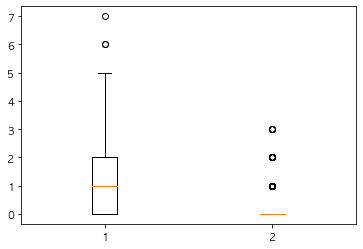

LeveneResult(statistic=739.5705359297309, pvalue=3.445590529529733e-139)


Ttest_indResult(statistic=22.769969050350337, pvalue=5.8277828266000424e-96)

In [54]:
x1 = np.array(crime_Y['cctv'])
x2 = np.array(crime_N['cctv'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['cctv']), np.array(crime_N['cctv'])))
scipy.stats.ttest_ind(np.array(crime_Y['cctv']), np.array(crime_N['cctv']), equal_var=False)

x1_mean :  3.065024630541872 / x2_mean :  0.6754643206256109


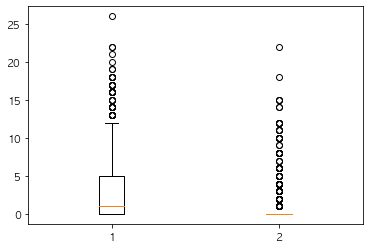

LeveneResult(statistic=301.83219175864645, pvalue=3.753142116974755e-63)


Ttest_indResult(statistic=15.845780527832746, pvalue=1.682238671662008e-52)

In [55]:
x1 = np.array(crime_Y['신호등'])
x2 = np.array(crime_N['신호등'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['신호등']), np.array(crime_N['신호등'])))
scipy.stats.ttest_ind(np.array(crime_Y['신호등']), np.array(crime_N['신호등']), equal_var=False)

x1_mean :  5.964532019704434 / x2_mean :  0.7986314760508308


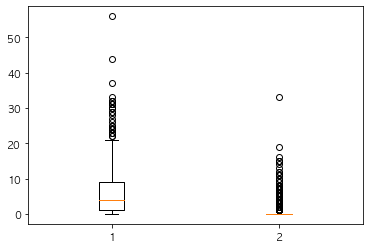

LeveneResult(statistic=528.1543618157538, pvalue=4.172384714109544e-104)


Ttest_indResult(statistic=23.14376557345599, pvalue=4.640189425797512e-99)

In [56]:
x1 = np.array(crime_Y['횡단보도'])
x2 = np.array(crime_N['횡단보도'])
print('x1_mean : ',x1.mean(),'/ x2_mean : ',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(np.array(crime_Y['횡단보도']), np.array(crime_N['횡단보도'])))
scipy.stats.ttest_ind(np.array(crime_Y['횡단보도']), np.array(crime_N['횡단보도']), equal_var=False)

In [57]:
numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_전체')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  33
Number of Categorical features:  2


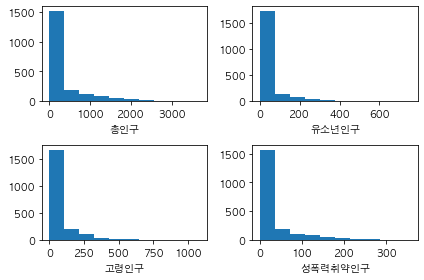

In [89]:
plt.subplot(221)
plt.hist(new_grid['총인구'])
plt.xlabel('총인구')

plt.subplot(222)
plt.hist(new_grid['유소년인구'])
plt.xlabel('유소년인구')

plt.subplot(223)
plt.hist(new_grid['고령인구'])
plt.xlabel('고령인구')

plt.subplot(224)
plt.hist(new_grid['성폭력취약인구'])
plt.xlabel('성폭력취약인구')

plt.tight_layout()
plt.show()

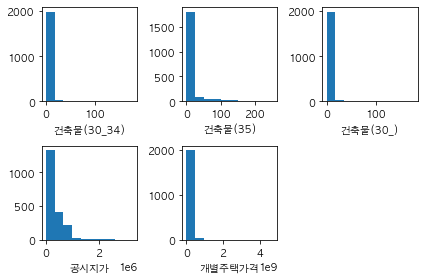

In [90]:
plt.subplot(231)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_34)')

plt.subplot(232)
plt.hist(new_grid['건축물(35)'])
plt.xlabel('건축물(35)')

plt.subplot(233)
plt.hist(new_grid['건축물(30_34)'])
plt.xlabel('건축물(30_)')

plt.subplot(234)
plt.hist(new_grid['공시지가'])
plt.xlabel('공시지가')

plt.subplot(235)
plt.hist(new_grid['개별주택가격'])
plt.xlabel('개별주택가격')

plt.tight_layout()
plt.show()

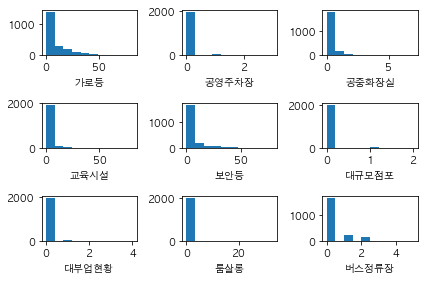

In [91]:
plt.subplot(331)
plt.hist(new_grid['가로등'])
plt.xlabel('가로등')

plt.subplot(332)
plt.hist(new_grid['공영주차장'])
plt.xlabel('공영주차장')

plt.subplot(333)
plt.hist(new_grid['공중화장실'])
plt.xlabel('공중화장실')

plt.subplot(334)
plt.hist(new_grid['교육시설'])
plt.xlabel('교육시설')

plt.subplot(335)
plt.hist(new_grid['보안등'])
plt.xlabel('보안등')

plt.subplot(336)
plt.hist(new_grid['대규모점포'])
plt.xlabel('대규모점포')

plt.subplot(337)
plt.hist(new_grid['대부업현황'])
plt.xlabel('대부업현황')

plt.subplot(338)
plt.hist(new_grid['룸살롱'])
plt.xlabel('룸살롱')

plt.subplot(339)
plt.hist(new_grid['버스정류장'])
plt.xlabel('버스정류장')

plt.tight_layout()
plt.show()

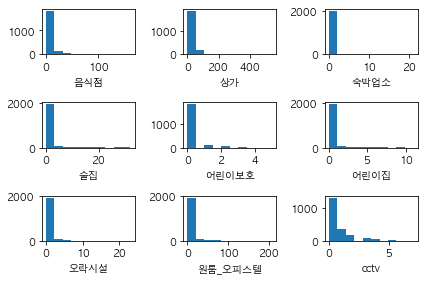

In [92]:
plt.subplot(331)
plt.hist(new_grid['음식점'])
plt.xlabel('음식점')

plt.subplot(332)
plt.hist(new_grid['상가'])
plt.xlabel('상가')

plt.subplot(333)
plt.hist(new_grid['숙박업소'])
plt.xlabel('숙박업소')

plt.subplot(334)
plt.hist(new_grid['술집'])
plt.xlabel('술집')

plt.subplot(335)
plt.hist(new_grid['어린이보호'])
plt.xlabel('어린이보호')

plt.subplot(336)
plt.hist(new_grid['어린이집'])
plt.xlabel('어린이집')

plt.subplot(337)
plt.hist(new_grid['오락시설'])
plt.xlabel('오락시설')

plt.subplot(338)
plt.hist(new_grid['원룸_오피스텔'])
plt.xlabel('원룸_오피스텔')

plt.subplot(339)
plt.hist(new_grid['cctv'])
plt.xlabel('cctv')

plt.tight_layout()
plt.show()

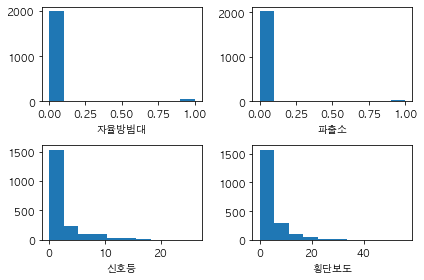

In [93]:
plt.subplot(221)
plt.hist(new_grid['자율방범대'])
plt.xlabel('자율방범대')

plt.subplot(222)
plt.hist(new_grid['파출소'])
plt.xlabel('파출소')

plt.subplot(223)
plt.hist(new_grid['신호등'])
plt.xlabel('신호등')

plt.subplot(224)
plt.hist(new_grid['횡단보도'])
plt.xlabel('횡단보도')

plt.tight_layout()
plt.show()

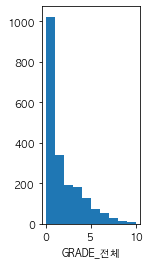

In [94]:
plt.subplot(131)
plt.hist(new_grid['GRADE_전체'])
plt.xlabel('GRADE_전체')
plt.show()

In [95]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_전체']).columns)
feature = new_grid[feature_list]
target = new_grid[['GRADE_전체']]

In [100]:
print(len(new_grid[new_grid['GRADE_전체']==0]))
print(len(new_grid[new_grid['GRADE_전체']>0]))

1023
1015


In [101]:
violence_0 = new_grid.query('GRADE_전체<1')
violence_1 = new_grid.query('GRADE_전체<=2 & GRADE_전체>=1')
violence_2 = new_grid.query('GRADE_전체<5 & GRADE_전체>=3')
violence_3 = new_grid.query('GRADE_전체<=6 & GRADE_전체>=5')
violence_4 = new_grid.query('GRADE_전체<=8 & GRADE_전체>=7')
violence_5 = new_grid.query('GRADE_전체<=10 & GRADE_전체>=9')

In [102]:
print(len(violence_0),len(violence_1),len(violence_2),len(violence_3),len(violence_4),len(violence_5))

1023 532 310 127 39 7


In [103]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [104]:
def mean_compare(x,crime) : 
    for i in range(11) :
        print(crime,'등급이',i,'인 격자의 평균',x,':',new_grid.query('GRADE_'+crime+'=='+str(i))[x].mean())
    print('------------------------------------------------')

In [105]:
mean_compare('총인구','전체')

mean_compare('건축물(30_)','전체')

mean_compare('개별주택가격','전체')

mean_compare('공시지가','전체')

mean_compare('가로등','전체')

mean_compare('보안등','전체')

mean_compare('공중화장실','전체')

mean_compare('공영주차장','전체')

mean_compare('교육시설','전체')

mean_compare('대규모점포','전체')

mean_compare('대부업현황','전체')

mean_compare('룸살롱','전체')

mean_compare('버스정류장','전체')

mean_compare('상가','전체')

mean_compare('숙박업소','전체')

mean_compare('술집','전체')

mean_compare('어린이보호','전체')

mean_compare('어린이집','전체')

mean_compare('오락시설','전체')

mean_compare('원룸_오피스텔','전체')

mean_compare('음식점','전체')

mean_compare('자율방범대','전체')

mean_compare('파출소','전체')

mean_compare('cctv','전체')

mean_compare('신호등','전체')

mean_compare('횡단보도','전체')

mean_compare('유소년인구','전체')

mean_compare('고령인구','전체')

전체 등급이 0 인 격자의 평균 총인구 : -0.4554144570361506
전체 등급이 1 인 격자의 평균 총인구 : -0.1976226349285123
전체 등급이 2 인 격자의 평균 총인구 : 0.4769093108580526
전체 등급이 3 인 격자의 평균 총인구 : 0.7504462897477485
전체 등급이 4 인 격자의 평균 총인구 : 0.9425747165023552
전체 등급이 5 인 격자의 평균 총인구 : 0.9952247969605309
전체 등급이 6 인 격자의 평균 총인구 : 0.9941046995883173
전체 등급이 7 인 격자의 평균 총인구 : 1.559697477258557
전체 등급이 8 인 격자의 평균 총인구 : 0.9188295577897642
전체 등급이 9 인 격자의 평균 총인구 : 1.3044523603480231
전체 등급이 10 인 격자의 평균 총인구 : -0.11249055385625246
------------------------------------------------
전체 등급이 0 인 격자의 평균 건축물(30_) : -0.3480986690889163
전체 등급이 1 인 격자의 평균 건축물(30_) : -0.0941256483338913
전체 등급이 2 인 격자의 평균 건축물(30_) : 0.5942220788799063
전체 등급이 3 인 격자의 평균 건축물(30_) : 0.6898662084929894
전체 등급이 4 인 격자의 평균 건축물(30_) : 0.5039456997042235
전체 등급이 5 인 격자의 평균 건축물(30_) : 0.5525798410076751
전체 등급이 6 인 격자의 평균 건축물(30_) : 0.5639293493645797
전체 등급이 7 인 격자의 평균 건축물(30_) : 0.3506541505722029
전체 등급이 8 인 격자의 평균 건축물(30_) : -0.03043946871766064
전체 등급이 9 인 격자의 평균 건축물(30_) : 0.5176148

In [106]:
new_grid['범죄빈도_4'] = 0

In [107]:
new_grid.loc[(new_grid['GRADE_전체']==0),'범죄빈도_4'] = 0
new_grid.loc[(new_grid['GRADE_전체']>0)&(new_grid['GRADE_전체']<4),'범죄빈도_4'] = 1
new_grid.loc[(new_grid['GRADE_전체']>=4)&(new_grid['GRADE_전체']<8),'범죄빈도_4'] = 2
new_grid.loc[(new_grid['GRADE_전체']>=8)&(new_grid['GRADE_전체']<11),'범죄빈도_4'] = 3

In [108]:
#new_grid.loc[(new_grid['GRADE_전체']==0),'범죄빈도_4'] = 0
new_grid.loc[(new_grid['GRADE_전체']>=0)&(new_grid['GRADE_전체']<4),'범죄빈도_3'] = 0
new_grid.loc[(new_grid['GRADE_전체']>=4)&(new_grid['GRADE_전체']<8),'범죄빈도_3'] = 1
new_grid.loc[(new_grid['GRADE_전체']>=8)&(new_grid['GRADE_전체']<11),'범죄빈도_3'] = 2

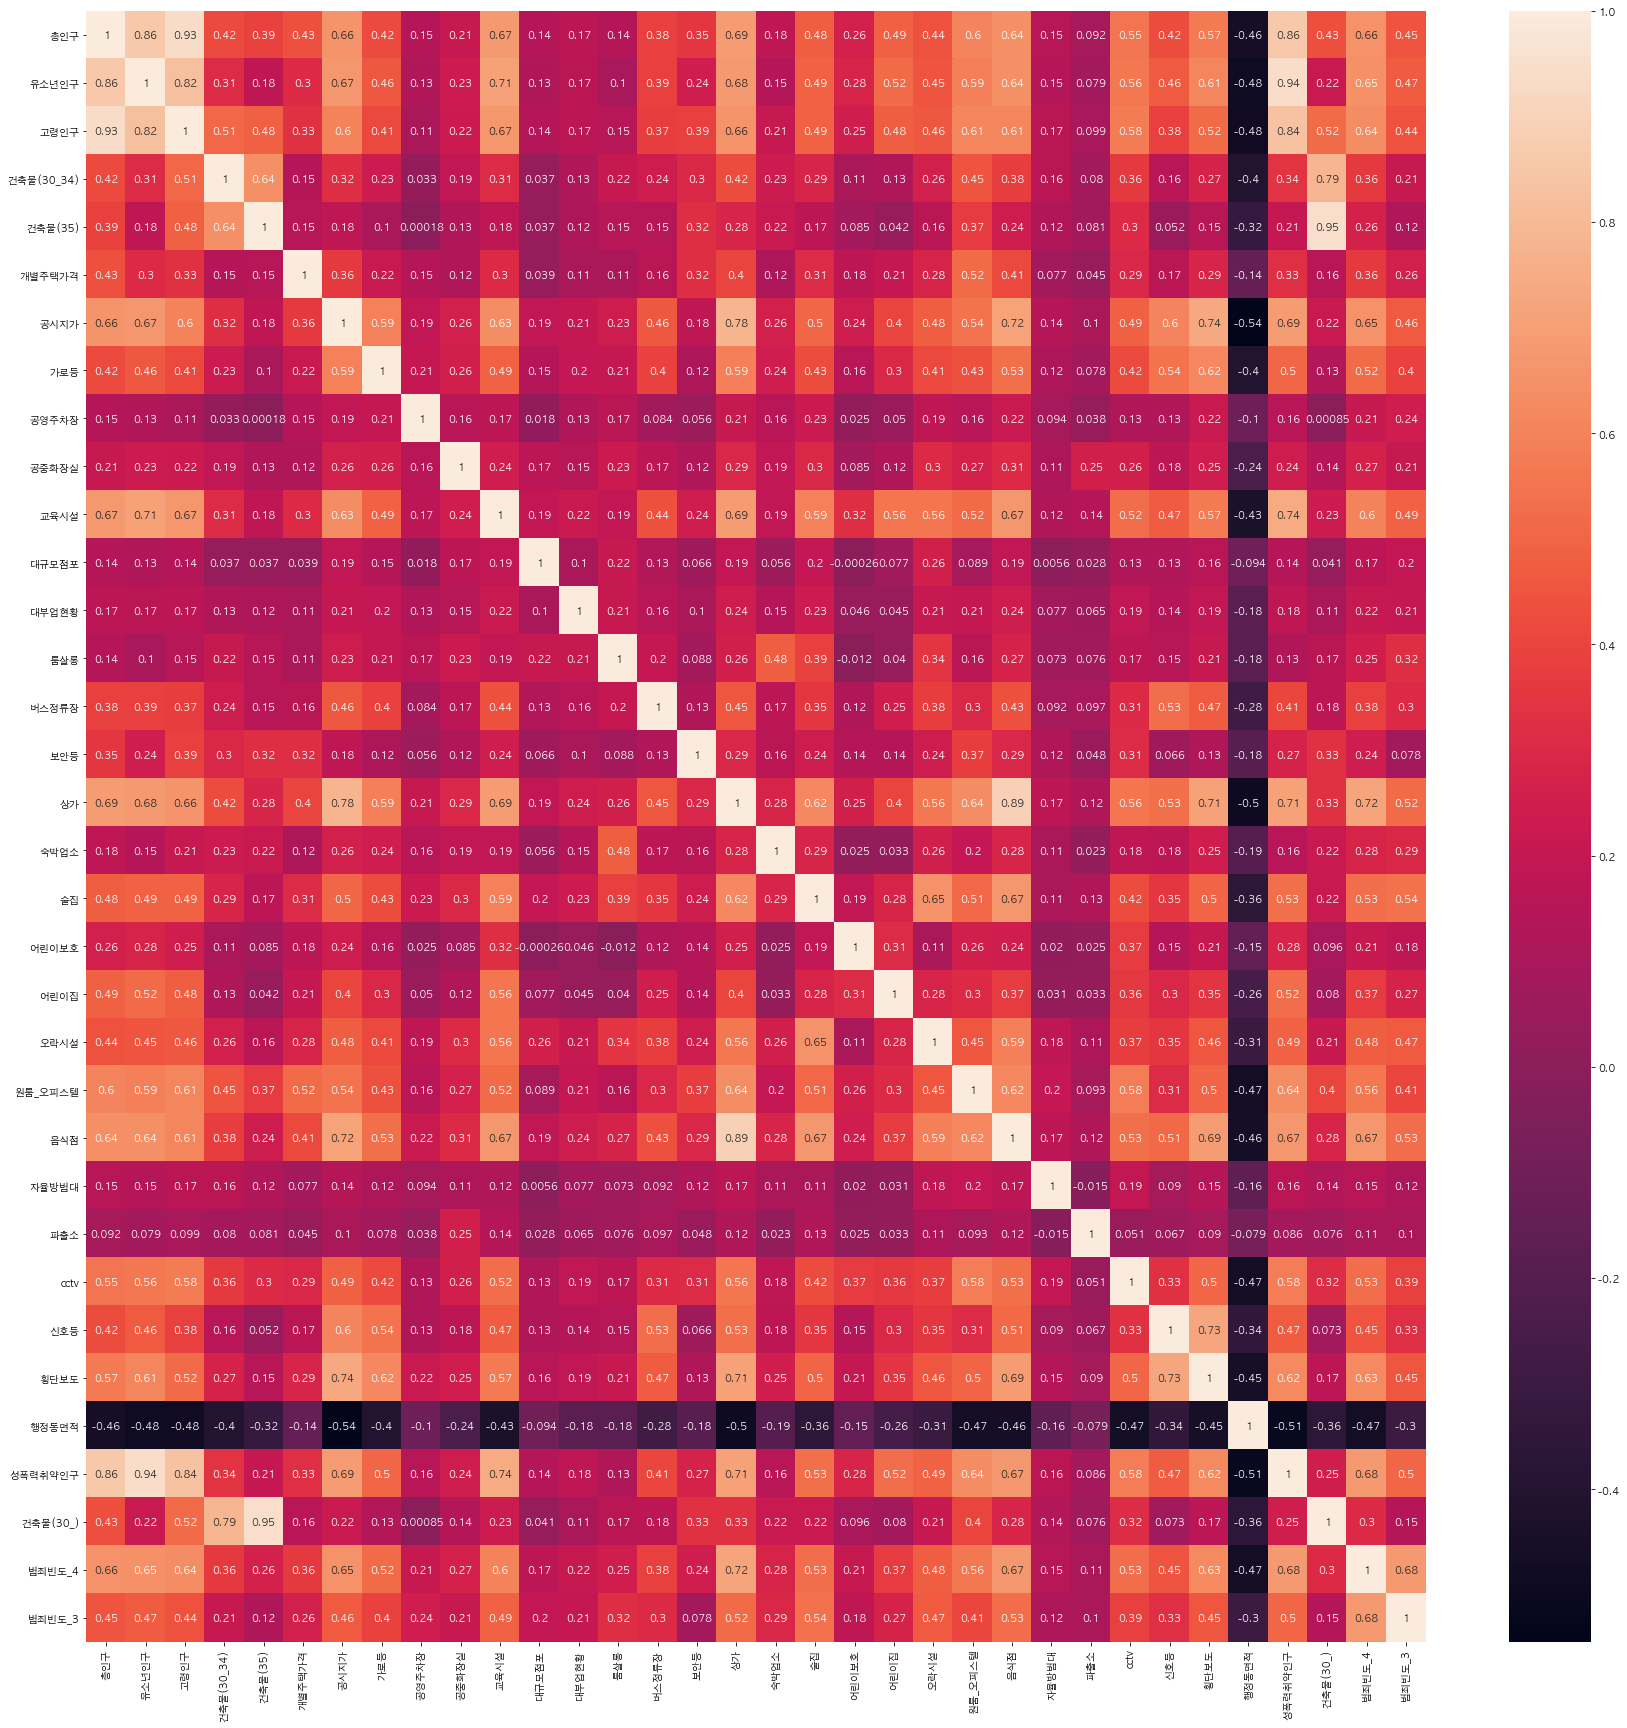

In [109]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_grid.drop(columns = ['GRADE_전체']).corr(method = 'spearman'), annot=True)
plt.show()

### 전체 변수 간 상관관계 
 - 인구 사회학적 변수는 변수간 상관관계가 크며, 이는 다중공선성 제거를 위해 변수를 선택할 필요가 있다. 또한, 대부분 범죄 등급과도 큰 상관관계를 보이고 있다. 

#### 종속변수 (3대범죄)를 기반으로 한 상관계수 확인
 
- `인구` : 총인구 (0.66),성폭력취약인구(0.68), 유소년인구(0.65), 고령인구(0.65)
- `토지` : 30년 이상35년 미만 건축물(0.36), 35년 이상건축물(0.26), 30년 이상 건축물 (0.3),개별주택가격 (0.36), 공시지가(0.65)
- `시설물` : 가로등(0.62), 공영주차장(0.21), 공중화장실(0.27), 교육시설(0.6), 대규모점포(0.17), 대부업체현황(0.22), 룸살롱(0.25), 버스정류장(0.38), 보안등(0.24), 상가(0.72), 숙박업소(0.28), 술집(0.53), 어린이보호구역(0.21), 어린이집(0.37), 오락시설(0.48), 원룸_오피스텔(0.56), 음식점(0.67), 자율방범대(0.15), 파출소(0.11), cctv(0.53), 신호등(0.45), 횡단보도(0.63)

In [55]:
numerical_feats = new_grid.dtypes[new_grid.dtypes != "object"].index.tolist()
numerical_feats.remove('GRADE_전체')
numerical_feats.remove('범죄빈도_4')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = new_grid.dtypes[new_grid.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  32
Number of Categorical features:  2


In [56]:
scaler = StandardScaler()
new_grid[numerical_feats] = scaler.fit_transform(new_grid[numerical_feats])

In [390]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_전체','범죄빈도_4']).columns)
feature = new_grid[feature_list]
target = new_grid[['범죄빈도_4']]

In [391]:
new_grid['GRADE_전체'].value_counts()

0.0     1023
1.0      338
2.0      194
3.0      182
4.0      128
5.0       73
6.0       54
7.0       27
8.0       12
10.0       4
9.0        3
Name: GRADE_전체, dtype: int64

In [392]:
new_grid['범죄빈도_4'].value_counts()

0    1023
1     714
2     282
3      19
Name: 범죄빈도_4, dtype: int64

In [393]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.7306182531894013


array([[958,  64,   1,   0],
       [266, 379,  68,   1],
       [ 11, 126, 143,   2],
       [  0,   4,   6,   9]])

In [394]:
from sklearn.metrics import classification_report
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1023
           1       0.66      0.53      0.59       714
           2       0.66      0.51      0.57       282
           3       0.75      0.47      0.58        19

    accuracy                           0.73      2038
   macro avg       0.71      0.61      0.65      2038
weighted avg       0.72      0.73      0.72      2038



In [396]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(new_grid)):
    df_train = new_grid.iloc[idx_train]
    df_test = new_grid.iloc[idx_test]
    feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_전체','범죄빈도_4']).columns)
    feature = df_train[feature_list]
    target = df_train[['범죄빈도_4']]
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['범죄빈도_4'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
print(scores)
scores.mean()

학습 Accuracy = 0.73496933, 검증 Accuracy = 0.72303922
학습 Accuracy = 0.73558282, 검증 Accuracy = 0.69117647
학습 Accuracy = 0.72822086, 검증 Accuracy = 0.71323529
학습 Accuracy = 0.74248927, 검증 Accuracy = 0.70761671
학습 Accuracy = 0.72838749, 검증 Accuracy = 0.71253071
[0.72303922 0.69117647 0.71323529 0.70761671 0.71253071]


0.7095196801079154

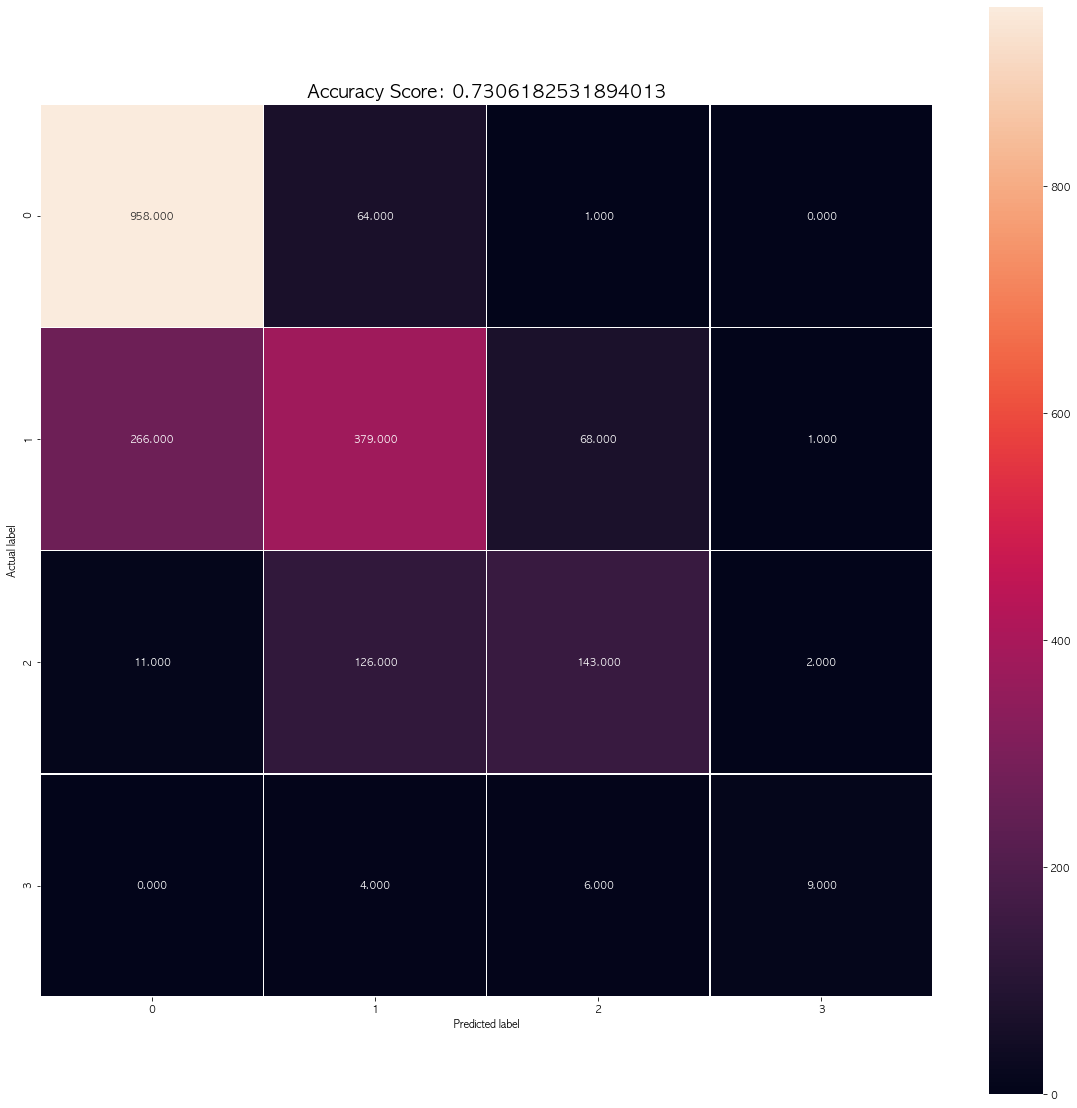

In [397]:
plt.figure(figsize=(20,20)) # chart size 
sns.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

In [403]:
feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_전체','범죄빈도_4','범죄빈도_3']).columns)
feature = new_grid[feature_list]
target = new_grid[['범죄빈도_3']]

In [404]:
model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
acc=accuracy_score(target,y_pred)
print('accuracy =', acc) 
con_mat = confusion_matrix(y_true=target, y_pred=y_pred) 
con_mat 

accuracy = 0.8935230618253189


array([[1671,   65,    1],
       [ 139,  141,    2],
       [   5,    5,    9]])

In [405]:
from sklearn.metrics import classification_report
model.fit(X=feature, y=target) # 학습수행 
y_pred = model.predict(X = feature)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1737
           1       0.67      0.50      0.57       282
           2       0.75      0.47      0.58        19

    accuracy                           0.89      2038
   macro avg       0.78      0.65      0.70      2038
weighted avg       0.88      0.89      0.89      2038



In [407]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(new_grid)):
    df_train = new_grid.iloc[idx_train]
    df_test = new_grid.iloc[idx_test]
    feature_list = list(new_grid.drop(columns = ['행정동코드','ID','GRADE_전체','범죄빈도_4','범죄빈도_3']).columns)
    feature = df_train[feature_list]
    target = df_train[['범죄빈도_3']]
    
    
    model = LogisticRegression(random_state=0, solver ='lbfgs', multi_class='multinomial')
    model.fit(X=feature, y=target) # 학습수행 
    y_pred1 = model.predict(X = feature)
    y_pred2 = model.predict(X = df_test[feature_list])
    acc_1=accuracy_score(target,y_pred1)
    acc_2=accuracy_score(df_test['범죄빈도_3'],y_pred2)
    
    scores[i] = acc_2
    print("학습 Accuracy = {:.8f}, 검증 Accuracy = {:.8f}".format(acc_1, acc_2))
print(scores)
scores.mean()

학습 Accuracy = 0.89447853, 검증 Accuracy = 0.86764706
학습 Accuracy = 0.89386503, 검증 Accuracy = 0.87990196
학습 Accuracy = 0.89509202, 검증 Accuracy = 0.88480392
학습 Accuracy = 0.89944819, 검증 Accuracy = 0.88206388
학습 Accuracy = 0.89699571, 검증 Accuracy = 0.86732187
[0.86764706 0.87990196 0.88480392 0.88206388 0.86732187]


0.876347738112444

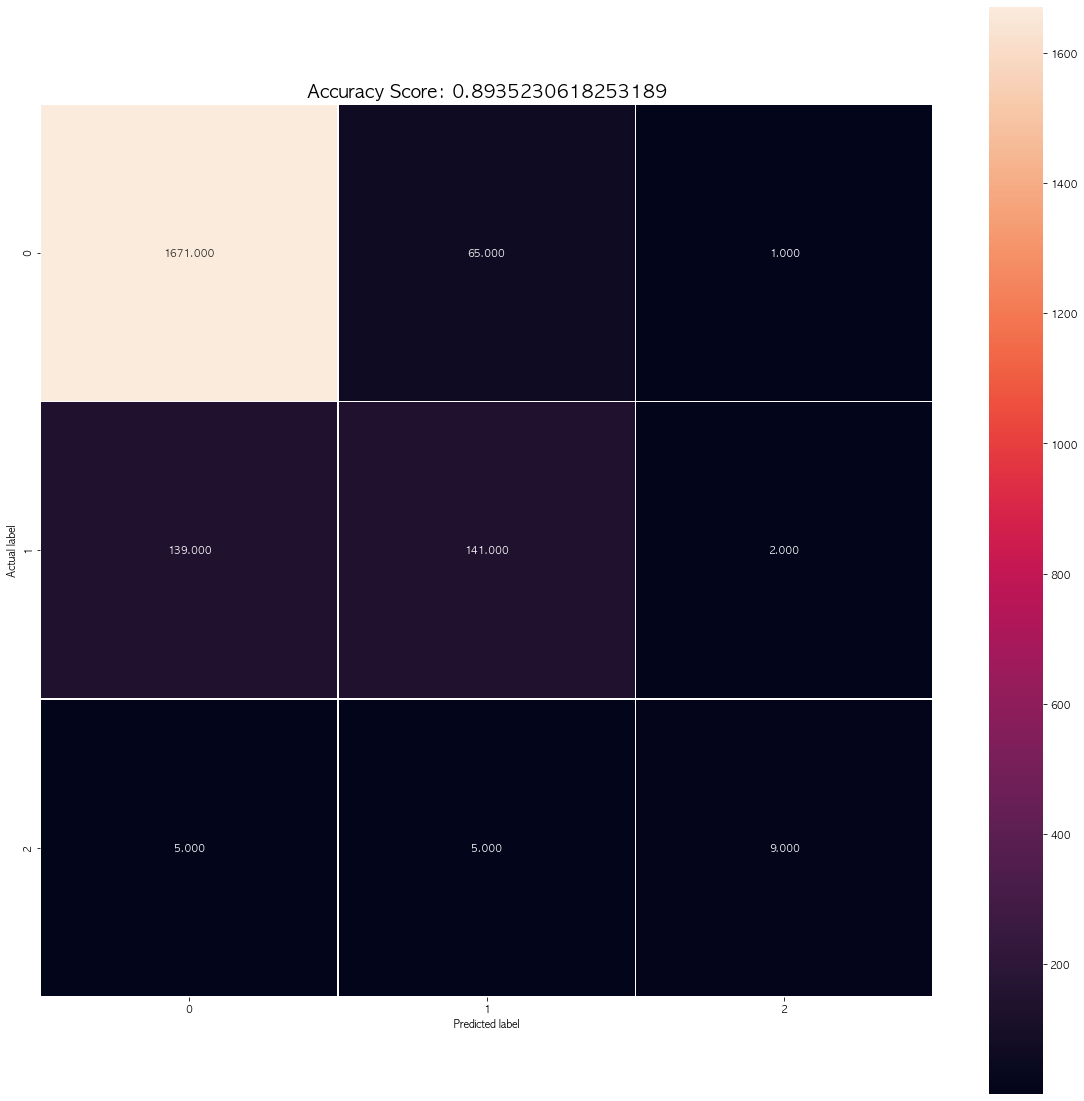

In [408]:
plt.figure(figsize=(20,20)) # chart size 
sns.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 